In [54]:
import os
import os.path
import pandas as pd
import datetime
import matplotlib
from sklearn.svm import SVC
%matplotlib inline

In [42]:
matplotlib.rcParams['figure.figsize'] = (14.0, 7.0)

In [2]:
DATA_PATH = '/Users/ilaif/Desktop/data/ds-workshop/accidents'

In [6]:
acc_data_path = os.path.join(DATA_PATH, 'H20161161', 'H20161161AccData.csv')

In [11]:
acc_data = pd.read_csv(acc_data_path)

In [13]:
df.columns

Index(['pk_teuna_fikt', 'sug_tik', 'THUM_GEOGRAFI', 'SUG_DEREH',
       'SEMEL_YISHUV', 'REHOV1', 'REHOV2', 'BAYIT', 'ZOMET_IRONI', 'KVISH1',
       'KVISH2', 'KM', 'ZOMET_LO_IRONI', 'YEHIDA', 'SHNAT_TEUNA',
       'HODESH_TEUNA', 'YOM_BE_HODESH', 'SHAA', 'SUG_YOM', 'YOM_LAYLA',
       'YOM_BASHAVUA', 'RAMZOR', 'HUMRAT_TEUNA', 'SUG_TEUNA', 'ZURAT_DEREH',
       'HAD_MASLUL', 'RAV_MASLUL', 'MEHIRUT_MUTERET', 'TKINUT', 'ROHAV',
       'SIMUN_TIMRUR', 'TEURA', 'BAKARA', 'MEZEG_AVIR', 'PNE_KVISH',
       'SUG_EZEM', 'MERHAK_EZEM', 'LO_HAZA', 'OFEN_HAZIYA', 'MEKOM_HAZIYA',
       'KIVUN_HAZIYA', 'MAHOZ', 'NAFA', 'EZOR_TIVI', 'MAAMAD_MINIZIPALI',
       'ZURAT_ISHUV', 'STATUS_IGUN', 'X', 'Y'],
      dtype='object')

In [22]:
df['date'] = df.apply(lambda s: datetime.datetime(int(s['SHNAT_TEUNA']), int(s['HODESH_TEUNA']), int(s['YOM_BE_HODESH'])), axis=1)

In [48]:
df['week_year'] = df['date'].apply(lambda d: d.isocalendar()[1])

In [33]:
df.groupby(['SHNAT_TEUNA', 'HODESH_TEUNA']).count()['pk_teuna_fikt']

SHNAT_TEUNA  HODESH_TEUNA
2016         1               4085
             2               4022
             3               4333
             4               3870
             5               4354
             6               4312
             7               4294
             8               4006
             9               4308
             10              3466
             11              4282
             12              3454
Name: pk_teuna_fikt, dtype: int64

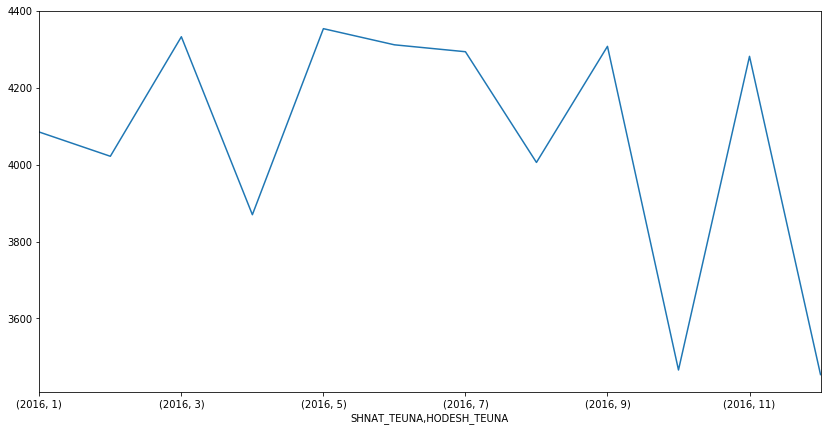

In [43]:
df.groupby(['SHNAT_TEUNA', 'HODESH_TEUNA']).count()['pk_teuna_fikt'].plot()

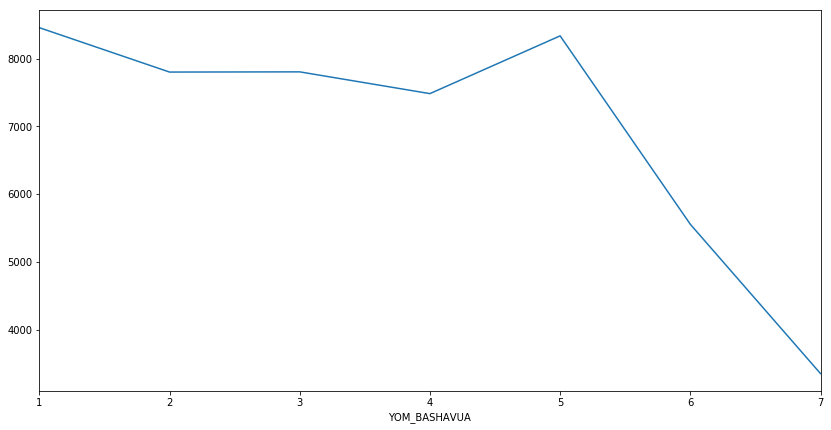

In [44]:
df.groupby(['YOM_BASHAVUA']).count()['pk_teuna_fikt'].plot()

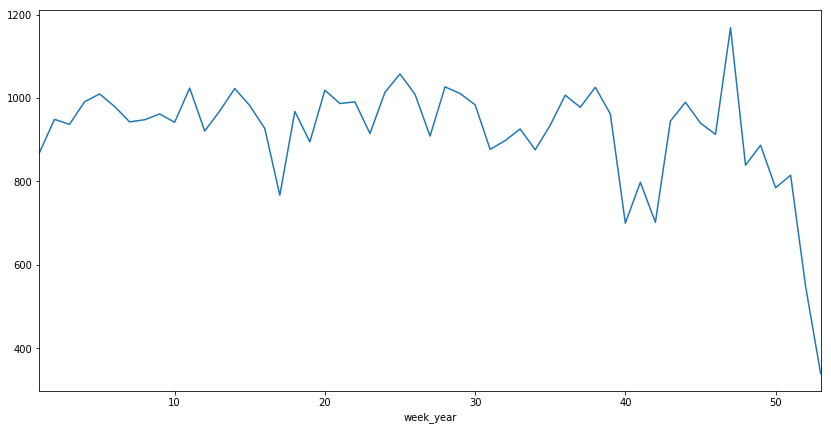

In [49]:
df.groupby(['week_year']).count()['pk_teuna_fikt'].plot()

In [52]:
df.head()

,pk_teuna_fikt,sug_tik,THUM_GEOGRAFI,SUG_DEREH,SEMEL_YISHUV,REHOV1,REHOV2,BAYIT,ZOMET_IRONI,KVISH1,...,MAHOZ,NAFA,EZOR_TIVI,MAAMAD_MINIZIPALI,ZURAT_ISHUV,STATUS_IGUN,X,Y,date,week_year
0,2015003066,3,1,3,0,NaN,NaN,NaN,NaN,866.0,...,NaN,99,NaN,NaN,NaN,1,238293.0,759195.0,2016-01-03,53
1,2015006052,3,1,2,8600,416.0,NaN,9999.0,NaN,NaN,...,5.0,51,512.0,0.0,14.0,3,181344.0,665999.0,2016-02-08,6
2,2015010494,3,1,2,4000,0.0,NaN,9999.0,NaN,NaN,...,3.0,31,311.0,0.0,13.0,2,201125.0,745460.0,2016-02-07,5
3,2015012317,3,1,2,1015,126.0,NaN,9999.0,NaN,NaN,...,1.0,11,111.0,99.0,16.0,3,213822.0,633401.0,2016-01-19,3
4,2015029077,3,1,2,662,0.0,NaN,9999.0,NaN,NaN,...,2.0,24,243.0,52.0,31.0,2,228135.0,766966.0,2016-01-07,1


In [99]:
df.groupby('ZURAT_DEREH')['pk_teuna_fikt'].count()

ZURAT_DEREH
5         5
6         1
8       154
9     48622
10        2
11        2
Name: pk_teuna_fikt, dtype: int64

In [73]:
filtered_df = df[df['SUG_TEUNA'].isin([1, 10])]

In [74]:
X = filtered_df[['ZURAT_DEREH', 'HAD_MASLUL', 'RAV_MASLUL', 'MEHIRUT_MUTERET', 'TKINUT']]

In [76]:
y = filtered_df['SUG_TEUNA'] # 1 (hitting pedestrian), 10 (rollover)

In [78]:
X

,ZURAT_DEREH,HAD_MASLUL,RAV_MASLUL,MEHIRUT_MUTERET,TKINUT
7,9,9,0,0,0
11,9,9,0,0,0
14,9,9,0,0,0
26,9,9,0,0,0
30,9,9,0,0,0
57,9,9,0,0,0
60,9,9,0,0,0
69,9,9,0,0,0
81,9,9,0,0,0
86,9,9,0,0,0


In [77]:
clf = SVC(kernel='rbf')

In [ ]:
clf.fit(X, y)

In [59]:
print(clf.predict([[-0.8, -1]]))

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [100]:
df.describe()

,pk_teuna_fikt,sug_tik,THUM_GEOGRAFI,SUG_DEREH,SEMEL_YISHUV,REHOV1,REHOV2,BAYIT,ZOMET_IRONI,KVISH1,...,KIVUN_HAZIYA,MAHOZ,NAFA,EZOR_TIVI,MAAMAD_MINIZIPALI,ZURAT_ISHUV,STATUS_IGUN,X,Y,week_year
count,4.878600e+04,48786.0,48786.000000,48786.000000,48786.000000,38542.000000,2653.000000,36665.000000,2.652000e+03,8956.000000,...,48786.000000,39350.000000,48786.000000,39350.000000,39256.000000,39350.000000,48786.000000,48296.000000,48296.000000,48786.000000
mean,2.016050e+09,3.0,1.019903,2.302648,3827.698049,704.697966,779.919714,8534.517142,1.356777e+07,271.517977,...,8.975218,3.744574,50.907268,395.899085,12.749057,16.805870,2.114418,196607.160324,675432.737080,26.128336
std,3.540976e+04,0.0,0.139669,0.805948,3253.630744,1347.536895,852.586411,3527.709347,1.955230e+07,1019.364077,...,0.436921,1.557081,27.290797,153.520713,31.725581,6.152719,1.073857,20834.666604,55236.638361,14.889764
min,2.015003e+09,3.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,...,1.000000,1.000000,11.000000,111.000000,0.000000,12.000000,1.000000,130771.000000,381414.000000,1.000000
25%,2.016025e+09,3.0,1.000000,2.000000,478.000000,0.000000,263.000000,9999.000000,7.470003e+06,4.000000,...,9.000000,2.000000,31.000000,245.000000,0.000000,13.000000,1.000000,180941.500000,644590.000000,13.000000
50%,2.016050e+09,3.0,1.000000,2.000000,3000.000000,221.000000,502.000000,9999.000000,8.900106e+06,34.000000,...,9.000000,4.000000,44.000000,422.000000,0.000000,14.000000,2.000000,190403.000000,665536.000000,26.000000
75%,2.016075e+09,3.0,1.000000,2.000000,7000.000000,801.000000,969.000000,9999.000000,1.304555e+07,80.000000,...,9.000000,5.000000,61.000000,511.000000,0.000000,16.000000,3.000000,210575.000000,724723.000000,39.000000
max,2.016100e+09,3.0,2.000000,4.000000,9800.000000,9998.000000,7001.000000,11111.000000,1.000000e+08,9998.000000,...,9.000000,7.000000,99.000000,999.000000,99.000000,53.000000,9.000000,279655.000000,798203.000000,53.000000


In [101]:
df.describe()

,pk_teuna_fikt,sug_tik,THUM_GEOGRAFI,SUG_DEREH,SEMEL_YISHUV,REHOV1,REHOV2,BAYIT,ZOMET_IRONI,KVISH1,...,KIVUN_HAZIYA,MAHOZ,NAFA,EZOR_TIVI,MAAMAD_MINIZIPALI,ZURAT_ISHUV,STATUS_IGUN,X,Y,week_year
count,4.878600e+04,48786.0,48786.000000,48786.000000,48786.000000,38542.000000,2653.000000,36665.000000,2.652000e+03,8956.000000,...,48786.000000,39350.000000,48786.000000,39350.000000,39256.000000,39350.000000,48786.000000,48296.000000,48296.000000,48786.000000
mean,2.016050e+09,3.0,1.019903,2.302648,3827.698049,704.697966,779.919714,8534.517142,1.356777e+07,271.517977,...,8.975218,3.744574,50.907268,395.899085,12.749057,16.805870,2.114418,196607.160324,675432.737080,26.128336
std,3.540976e+04,0.0,0.139669,0.805948,3253.630744,1347.536895,852.586411,3527.709347,1.955230e+07,1019.364077,...,0.436921,1.557081,27.290797,153.520713,31.725581,6.152719,1.073857,20834.666604,55236.638361,14.889764
min,2.015003e+09,3.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,...,1.000000,1.000000,11.000000,111.000000,0.000000,12.000000,1.000000,130771.000000,381414.000000,1.000000
25%,2.016025e+09,3.0,1.000000,2.000000,478.000000,0.000000,263.000000,9999.000000,7.470003e+06,4.000000,...,9.000000,2.000000,31.000000,245.000000,0.000000,13.000000,1.000000,180941.500000,644590.000000,13.000000
50%,2.016050e+09,3.0,1.000000,2.000000,3000.000000,221.000000,502.000000,9999.000000,8.900106e+06,34.000000,...,9.000000,4.000000,44.000000,422.000000,0.000000,14.000000,2.000000,190403.000000,665536.000000,26.000000
75%,2.016075e+09,3.0,1.000000,2.000000,7000.000000,801.000000,969.000000,9999.000000,1.304555e+07,80.000000,...,9.000000,5.000000,61.000000,511.000000,0.000000,16.000000,3.000000,210575.000000,724723.000000,39.000000
max,2.016100e+09,3.0,2.000000,4.000000,9800.000000,9998.000000,7001.000000,11111.000000,1.000000e+08,9998.000000,...,9.000000,7.000000,99.000000,999.000000,99.000000,53.000000,9.000000,279655.000000,798203.000000,53.000000


In [103]:
df.groupby('BAYIT')['pk_teuna_fikt'].count()

BAYIT
1.0         1256
2.0          186
3.0          126
4.0          129
5.0          121
6.0          119
7.0          101
8.0          115
9.0           74
10.0         122
11.0          87
12.0         100
13.0          62
14.0          58
15.0          87
16.0          61
17.0          65
18.0          50
19.0          53
20.0          91
21.0          54
22.0         136
23.0          29
24.0          68
25.0          57
26.0          68
27.0          35
28.0          39
29.0          37
30.0          48
           ...  
267.0          1
270.0          1
288.0          1
290.0          1
291.0          1
293.0          1
300.0          2
301.0          1
309.0          1
313.0          1
401.0          1
512.0          1
548.0          1
553.0          2
568.0          1
658.0          1
815.0          1
999.0         14
1000.0         2
1051.0         1
1111.0        13
1400.0         1
1501.0         1
1700.0         1
3012.0         1
4009.0         1
5714.0         1
9999.0  